<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/dog_breeds_training_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/MyDrive"

!pip install -U -r yolov5/requirements.txt

/content/drive/MyDrive
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [2]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


In [3]:
!curl -L "https://app.roboflow.com/ds/IqnW564JIG?key=XKhw6RTI5A" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/labels/RussianBlue83_jpg.rf.ef821c6273d28b173297b68a3a72ccb1.txt  
  inflating: train/labels/RussianBlue84_jpg.rf.1ab7619553b1af5ca06c3ce6e2f74939.txt  
  inflating: train/labels/RussianBlue84_jpg.rf.a6d164750ca9dd8f4547aca92ac690ce.txt  
  inflating: train/labels/RussianBlue89_jpg.rf.4cbc221dc25ed824a06bf6fc01e24b54.txt  
  inflating: train/labels/RussianBlue89_jpg.rf.a4a173729513c67c616e3fdb3f69931d.txt  
  inflating: train/labels/RussianBlue8_jpeg.rf.12ff6cfe9e1d185c4a8082010c2925bd.txt  
  inflating: train/labels/RussianBlue8_jpeg.rf.74963d8cad64279c849b61f7ddcff464.txt  
  inflating: train/labels/RussianBlue90_jpg.rf.076315f9aa244da13fa018505daa3921.txt  
  inflating: train/labels/RussianBlue90_jpg.rf.904252421666138214e3a61197c87263.txt  
  inflating: train/labels/RussianBlue91_jpg.rf.4dec993c917a3ca3aa8158436ee7cfeb.txt  
  inflating: train/labels/RussianBlue91_jpg.rf.999b274320604e307b7f8dbe3b546c19.txt  
  inflating: train

In [4]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/dataset/train/images/*.jpg') + glob('/content/drive/MyDrive/dataset/train/images/*.jpeg') + glob('/content/drive/MyDrive/dataset/train/images/*.png')
valid_img_list = glob('/content/drive/MyDrive/dataset/valid/images/*.jpg') + glob('/content/drive/MyDrive/dataset/valid/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/valid/images/*.png')
test_img_list = glob('/content/drive/MyDrive/dataset/test/images/*.jpg') + glob('/content/drive/MyDrive/dataset/test/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/test/images/*.png')


# txt 파일에 write
with open('/content/drive/MyDrive/dataset/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/test.txt', 'w') as f:
	f.write('\n'.join(test_img_list) + '\n')

In [6]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
	data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/dataset/valid.txt'
data['test'] = '/content/drive/MyDrive/dataset/test.txt'

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
	yaml.dump(data, f)

{'names': ['Bichon', 'Chihuahua', 'Corgi', 'Jindo', 'Maltese', 'Pomeranian', 'Poodle', 'Pug', 'Retriever', 'Shihtzu', 'YorkshireTerrier', 'persian', 'ragdoll', 'russianblue', 'scottishfold', 'siam', 'turkishangora'], 'nc': 17, 'roboflow': {'license': 'CC BY 4.0', 'project': 'cat-and-dog-breeds-fgmzk', 'url': 'https://universe.roboflow.com/petective/cat-and-dog-breeds-fgmzk/dataset/20', 'version': 20, 'workspace': 'petective'}, 'test': '/content/drive/MyDrive/dataset/test.txt', 'train': '/content/drive/MyDrive/dataset/train.txt', 'val': '/content/drive/MyDrive/dataset/valid.txt'}


In [7]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [8]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/dataset/data.yaml \
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name dog_breeds_training_12

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
      44/49      4.74G    0.02083   0.009673    0.01307         28        640:  47% 210/447 [00:29<00:41,  5.74it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      44/49      4.74G     0.0209    0.00967    0.01304         34        640:  47% 211/447 [00:29<00:37,  6.28it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      44/49      4.74G    0.02091   0.009678    0.01309         43        640:  47% 211/447 [00:29<00:37,  6.28it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    

In [9]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_12/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/CorgiTest1.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_12/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/CorgiTest1.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/CorgiTest1.jpeg: 640x416 1 Corgi, 38.4ms
Speed: 0.6ms pre-process, 38.4ms inference, 700.2ms NMS per image at shape (1, 3, 640, 6

In [10]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_12/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/CorgiTest2.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_12/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/CorgiTest2.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/CorgiTest2.jpeg: 640x448 1 Corgi, 38.0ms
Speed: 0.7ms pre-process, 38.0ms inference, 529.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10


In [11]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_12/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/CorgiTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_12/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/CorgiTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/CorgiTest3.jpeg: 640x480 1 Corgi, 38.9ms
Speed: 0.7ms pre-process, 38.9ms inference, 582.9ms NMS per image at shape (1, 3, 640, 6

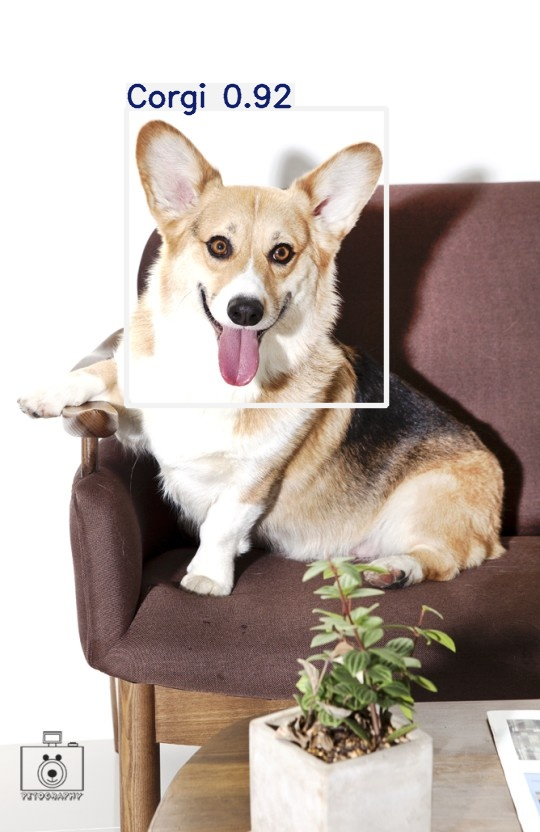

In [12]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp9/CorgiTest1.jpeg')
cv2_imshow(img)

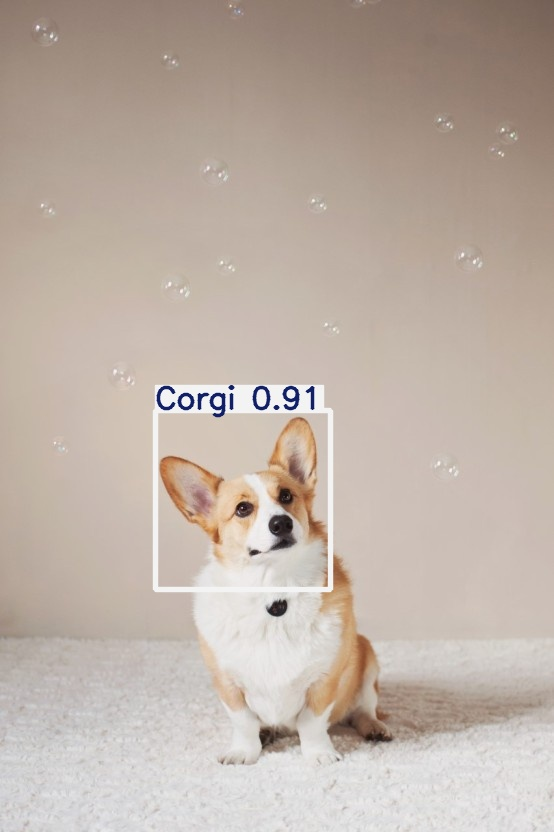

In [13]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp10/CorgiTest2.jpeg')
cv2_imshow(img)

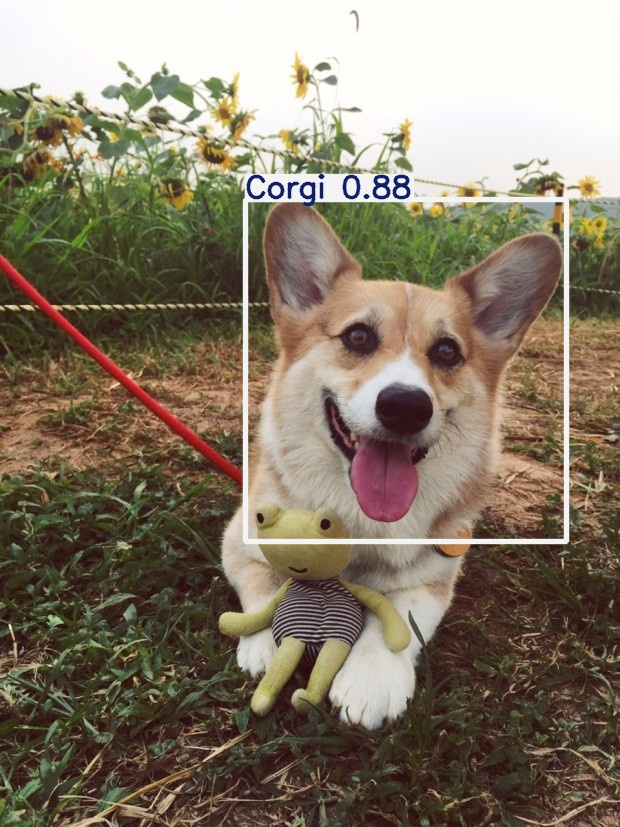

In [14]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp11/CorgiTest3.jpeg')
cv2_imshow(img)